# Limiting Magnitudes for MICADO

Here we give a quick look at how to use the functions from the submodule ``simcado.simulation``:

* ``limiting_mags()``, and
* ``plot_exptime_vs_limiting_mag()``

### Note: Paranal vs SkyCalc
Be careful with what you wish for: By default SimCADO uses the sky background provided by the [ESO SkyCalc tool](https://www.eso.org/observing/etc/bin/gen/form?INS.MODE=swspectr+INS.NAME=SKYCALC), which appears to underestimate the sky background (in J band by 0.5 mag and in K band by ~2 magnitudes). [See below](#Using-Paranal-sky-background-levels) for how to use Paranal sky background values.

### Contents of this Notebook

* [Getting a single limiting magnitude](#Getting-a-single-limiting-magnitude)
* [Using Paranal sky background levels](#Using-Paranal-sky-background-levels)
* [Limiting magnitudes for multiple exposure times¶](#Limiting-magnitudes-for-multiple-exposure-times)
* [Plotting the limiting magnitudes vs exposure time¶](#Plotting-the-limiting-magnitudes-vs-exposure-time)
* [Multiple filters at once](#Multiple-filters-at-once)
* [Vega and AB magnitudes](#Vega-and-AB-magnitudes)
* [The endless possibilities with the UserComands object](#The-endless-possibilities-with-the-UserComands-object)


## Getting a single limiting magnitude

Basic info that is needed is: 
* an exposure time (in seconds)
* a filter name recognised by simcado (see ``simcado.optics.get_filter_set``)

In [1]:
from simcado.simulation import limiting_mags, plot_exptime_vs_limiting_mag

lim_mag = limiting_mags(exptimes=3600, filter_names="J")

print("\n 5 sigma limit for 1 hour in J band:", lim_mag[0][0], "mag")

Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Reading out chip 0 using superfast
3600 J 28.130678663

 5 sigma limit for 1 hour in J band: 28.130678663 mag


**Note:** ``limiting_mags`` expects a list of exposure time and a list of filter, so the output will be a list in a list, even for a single liiting magnitude. E.g. the actual value is in ``lim_mag[0][0]``

## Using Paranal sky background levels

As mentioned above, by default SimCADO uses the [ESO SkyCalc tool](https://www.eso.org/observing/etc/bin/gen/form?INS.MODE=swspectr+INS.NAME=SKYCALC) for the background spectrum. However this spectrum may not be the best guess for the Cerro Armazones sky background. SimCADO allows us to override this and use our own sky background levels by using the ``ATMO_EC`` and ``ATMO_BG_MAGNITUDE`` keywords

For the record, the [Paranal sky background](https://www.eso.org/gen-fac/pubs/astclim/paranal/skybackground/) are:

| J | H | Ks |
|:-:|:-:|:--:|
|16.5|14.4|13.6|

The website specified Ks=13.0, however this is including the contribution from the warm telescope optics, which SimCADO takes care of seperately.

In [2]:
lim_mag = limiting_mags(exptimes=3600, filter_names="J", ATMO_EC="none", ATMO_BG_MAGNITUDE=16.5)

print("\n 5 sigma limit for 1 hour in J band:", lim_mag[0][0], "mag")

Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Reading out chip 0 using superfast
3600 J 27.5668013759

 5 sigma limit for 1 hour in J band: 27.5668013759 mag


### Changing the criteria for background limit

By convention we use $5\sigma$, however if we want to use $10\sigma$ instead, we can specify this with the ``limiting_sigma=`` parameter. E.g.

    >>> limiting_mags(..., limiting_sigma=10, ...)


## Limiting magnitudes for multiple exposure times

``limiting_mags()`` re-uses the photon flux expectation values on the focal plane array and scales then by the exposure time. Hence generating limiting magnitudes for multiple exposure times is quite fast. 

For example, if we want the limiting lamgnitudes for **10s, 1min, 1hr and 5 hrs**, we pass the following array:

In [3]:
exptimes = [10, 60, 3600, 18000]
lim_mag = limiting_mags(exptimes=exptimes, filter_names="J")

import numpy as np
print("\n 5 sigma limit for", exptimes, "sec in J band:", np.round(np.array(lim_mag), 4), "mag")

Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Reading out chip 0 using superfast
10 J 24.7666581594
Reading out chip 0 using superfast
60 J 25.7109444376
Reading out chip 0 using superfast
3600 J 28.1349113036
Reading out chip 0 using superfast
18000 J 29.1908560323

 5 sigma limit for [10, 60, 3600, 18000] sec in J band: [[ 24.7667  25.7109  28.1349  29.1909]] mag


## Plotting the limiting magnitudes vs exposure time

If we have a series of exposure times, we can use the flag in ``limiting_mags()`` to visualise the progression

In [4]:
exptimes = np.logspace(1, 4.25)

lim_mag = limiting_mags(exptimes=exptimes, filter_names="J", make_graph=True)

Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Reading out chip 0 using superfast
10.0 J 24.7686109314
Reading out chip 0 using superfast
11.6500162359 J 24.9211055851
Reading out chip 0 using superfast
13.5722878297 J 24.9368137932
Reading out chip 0 using superfast
15.8117373575 J 25.0432154685
Reading out chip 0 using superfast
18.4206996933 J 25.0053221901
Reading out chip 0 using superfast
21.4601450504 J 25.1725597456
Reading out chip 0 using superfast
25.0011038262 J 25.1957303261
Reading out chip 0 using superfast
29.1263265491 J 25.3908356636
Reading out chip 0 using superfast
33.932217719 J 25.3970443495
Reading out chip 0 using superfast
39.5310887347 J 25.6239370092
Reading out chip 0 using superfast
46.0537825582 J 25.5746557507
Reading out chip 0 using superfast
53.6527314529 J 25.683682

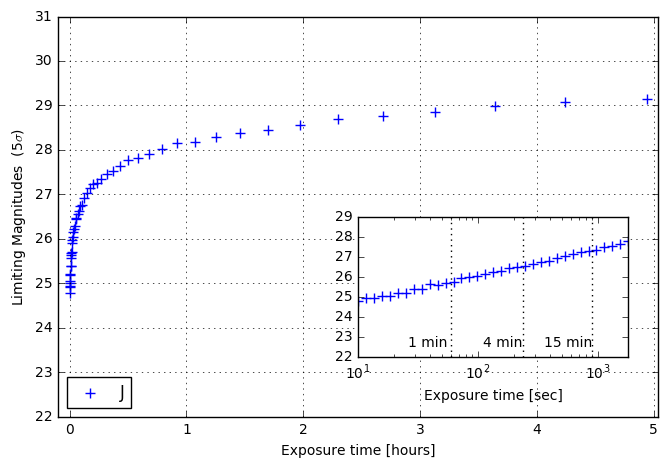

In [5]:
import matplotlib.pyplot as plt
plt.show()

### More control over the plot

The flag in ``limiting_mags()`` is nice for compact code and quick plots, but to have more control over what goes into the plot, it is best to assign the magnitudes returned to a variable and use ``plot_exptime_vs_limiting_mag()`` instead:

    plot_exptime_vs_limiting_mag(exptimes, limiting_mags, filter_names=["J", "H", "Ks"], 
                                 colors="bgrcymk", mmin=22, mmax=29,
                                 legend_loc=3, marker="+"):

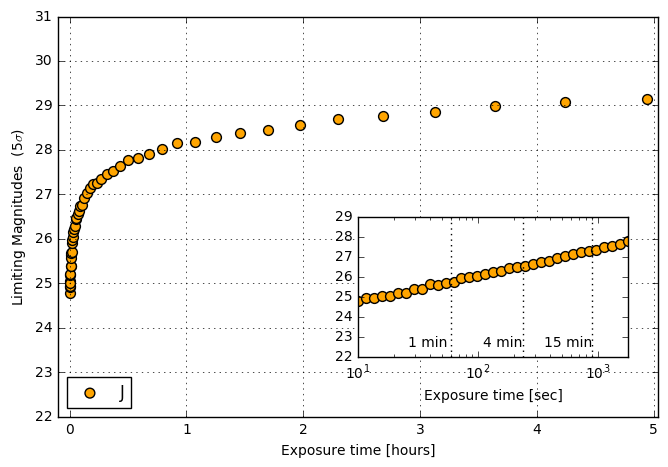

In [6]:
plot_exptime_vs_limiting_mag(exptimes, lim_mag, colors=["orange"], marker="o")
plt.show()

## Multiple filters at once

``limiting_mags()`` will also generate limiting magnitudes for any number of filters that are already in SimCADO. Use ``simcado.optics.get_filter_set()`` to call up the list of filter names that will be accepted by ``limiting_mags()``.

To do this, SimCADO generates an image for each of the filters with the photon flux expectation values

In [7]:
filter_names = ["J", "H", "Ks", "PaBeta"]

lim_mag = limiting_mags(exptimes=exptimes, filter_names=filter_names)

Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 5 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Reading out chip 0 using superfast
10.0 J 24.8338480613
Read

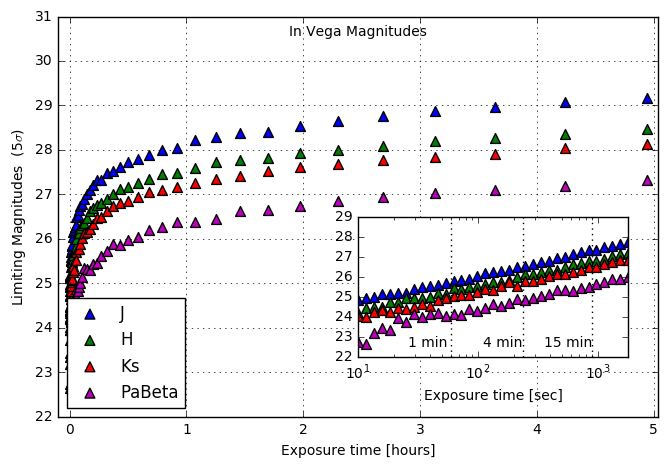

In [8]:
plot_exptime_vs_limiting_mag(exptimes, lim_mag, filter_names=filter_names, colors="bgrm", marker="^")
plt.suptitle("In Vega Magnitudes")
plt.show()

## Vega and AB magnitudes

SimCADO used Vega magnitudes by default. However, as AB magnitudes look more impressive in the NIR, we can add the conversion factors to ``limiting_mags`` in two ways (for the J, H and Ks bands):
* add directly to the output, or

        >>> AB_mags = (np.array( <output from limiting_mags> ).T + np.array((0.9, 1.4, 1.85)) ).T
        
* specify them as an input parameter

        >>> limiting_mags(..., AB_corrs=[0.9, 1.4, 1.85], ...)

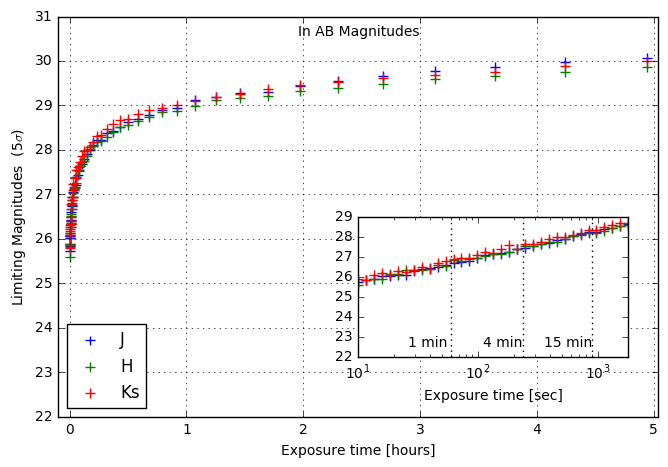

In [9]:
AB_mags = ( np.array(lim_mag[:3]).T + np.array((0.9, 1.4, 1.85)) ).T

plot_exptime_vs_limiting_mag(exptimes, AB_mags, filter_names=filter_names)
plt.suptitle("In AB Magnitudes")
plt.show()

### And once again with Paranal sky background levels

Unfortunately we can only pass single background magnitudes if we use the ``ATMO_BG_MAGNITUDE`` keyword. However ``limiting_mags()`` will take a list of ``simcado.UserCommands`` objects - one for each filter. Therefore to apply paranal sky background levels to all 3 filters at once, we will need 3 ``UserCommands`` objects:

In [10]:
import simcado as sim

bg_mags = [16.5, 14.4, 13.6]

exptimes = np.logspace(1, 4.25, num=20)
filter_names = ["J", "H", "Ks"]
AB_corrs=[0.9, 1.4, 1.85]

cmds = [sim.UserCommands(), sim.UserCommands(), sim.UserCommands()]

for cmd, mag in zip(cmds, bg_mags):
    cmd["ATMO_EC"] = "none"
    cmd["ATMO_BG_MAGNITUDE"] = mag

lim_mags = limiting_mags(exptimes, filter_names, cmds=cmds, AB_corrs=AB_corrs)

Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Reading out chip 0 using superfast
10.0 J 25.0298493012
Reading out chip 0 using superfast
14.8269776046 J 25.3194811157
Reading out chip 0 using superfast
21.9839264886 J 25.4016170467
Reading out chip 0 using superfast
32.5955185707 J 25.641863191
Reading out chip 0 using superfast
48.3293023

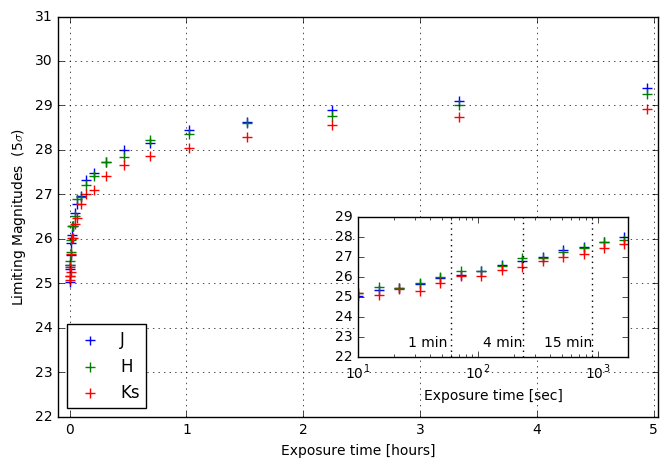

In [11]:
plot_exptime_vs_limiting_mag(exptimes, lim_mags, filter_names)
plt.show()

## The endless possibilities with the UserComands object

Because we can pass a ``UserCommands`` object to ``limiting_mags`` we can no (theoretically) test and compare the limiting magnitudes for any combination of parameters and values that are available in the ``UserCommands`` dictionaries.

For example we can see how a miss-aligned ADC will affect the limiting magnitude of MICADO:


In [12]:
ADC_levels = [100, 75, 50, 25]

filter_names = ["J"] * 4

cmds = [sim.UserCommands(), sim.UserCommands(), sim.UserCommands(), sim.UserCommands()]

for cmd, adc_lvl in zip(cmds, ADC_levels):
    cmd["OBS_ZENITH_DIST"] = 60
    cmd["INST_ADC_PERFORMANCE"] = adc_lvl
    
lim_mags = limiting_mags(exptimes, filter_names, cmds=cmds)

Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 6 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 12 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 18 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0 using superfast
Reading out chip 0 using superfast
10.0 J 24.4774538252
Re

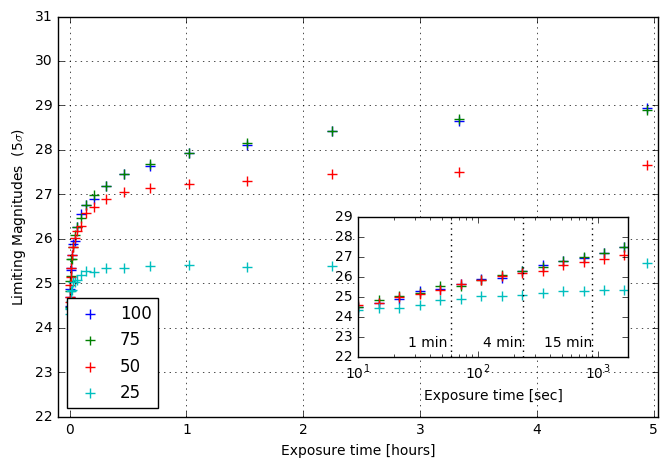

In [13]:
plot_exptime_vs_limiting_mag(exptimes, lim_mags, ADC_levels)
plt.show()

**This example should be taken with a grain of salt as the limiting magnitude determination depends strongly on the size of the photometric aperture. For the 25% ADC case, the size of the stars are larger than the aperture in the up-down direction and so the phtometery becomes  somewhat questionable.**